In [1]:
import os
import mat73
import numpy as np
import pandas as pd
import time
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import copy
np.random.seed(0)

In [2]:
def load_dataframe():
    data_dict = mat73.loadmat('spect_phee2monkey_stft_40X40_2monkey.mat')
    part_data_dict = {key: data_dict[key] for key in data_dict.keys() if key in ['callee', 'caller', 'expname', 'expnameid']}
    df = pd.DataFrame(part_data_dict)
    for name in ['callee', 'caller', 'expname']:
        df[name] = df[name].apply(lambda x: x[0])
    frq = pd.DataFrame(data_dict["frq"].T)
    frq.columns = [f"frq_{i}" for i in range(1, 41)]
    ft = np.abs(pd.DataFrame(data_dict["ft"].T))
    ft.columns = [f"ft_{i}" for i in range(1, 41)]
    df = pd.concat([df, frq, ft], axis=1)
    return df

In [3]:
def show_cm(cmn,title,labels,average_oob_score,to_save = False, directory_to_save_in = None):
    fig, ax = plt.subplots(figsize=(15,15))
    f = sns.heatmap(cmn, annot=True, fmt=".1%", linewidths=1.0, square=1, cmap='rocket_r')
    plt.title(title, fontsize=25)
    plt.xlabel('Predicted Label', fontsize=20)
    plt.ylabel('True Label', fontsize=20)
    _ = ax.set_xticklabels(labels)
    _ = plt.xticks(rotation=70)
    _ = ax.set_yticklabels(labels)
    _ = plt.yticks(rotation=0)

    if to_save:
        if not os.path.exists(directory_to_save_in):
            os.makedirs(directory_to_save_in)
        plt.savefig(directory_to_save_in+f"/{title}.pdf",format='pdf')

In [4]:
df= load_dataframe()

57.599663496017456


In [5]:
df = df[df['caller'] != 'Chaos']

In [6]:
df_copy = copy.deepcopy(df)

In [7]:
def pred_caller_to_collees_train_test(df, caller_label, callees_to_drop = [], repeat_amount = 100):
    df_caller = df[df["caller"] == caller_label].drop(columns="caller")
    df_caller = df_caller[~df_caller["callee"].isin(callees_to_drop)]
    X, y = df_caller.drop(columns="callee"),df_caller["callee"]
    labels = y.unique()
    cm_list = []
    oob_score_ls = []
    rus = RandomUnderSampler()
    rfc = RandomForestClassifier(oob_score=True)
    for i in tqdm.tqdm(range(repeat_amount)):
        X_resampled, y_resampled = rus.fit_resample(X,y)
        rfc.fit(X_resampled,y_resampled)
        oob_score = rfc.oob_score_
        y_pred = rfc.classes_[np.argmax(rfc.oob_decision_function_,axis=1)]
        cm = confusion_matrix(y_true=y_resampled, y_pred=y_pred, labels=np.unique(y))
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_list.append(cmn)
        oob_score_ls.append(oob_score)
    return np.mean(cm_list, axis=0), np.mean(oob_score_ls), labels

In [8]:
directory_to_save_in = "Callers Callee Predictions Using Max Signal, Derivative & Amplitude"

100%|██████████| 100/100 [50:33<00:00, 30.34s/it]


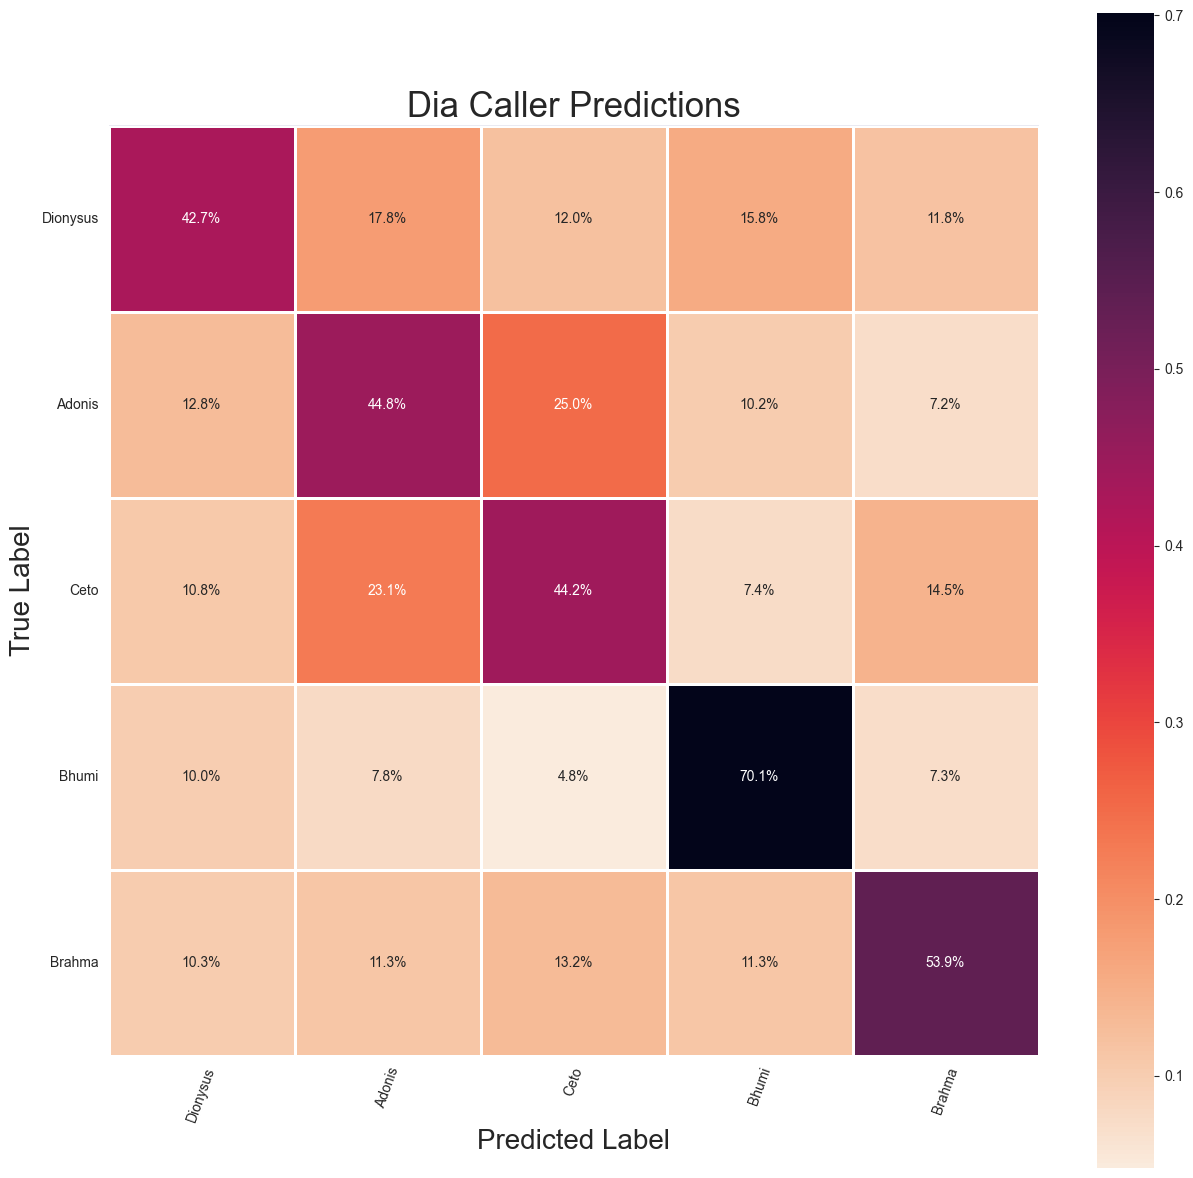

In [9]:
cmn, oob_score,labels =  pred_caller_to_collees_train_test(df_copy.drop(columns=["expname", "expnameid"]),'Dia',['Ella'])
title = "Dia Caller Predictions"
show_cm(cmn,title,labels,oob_score,True,directory_to_save_in)

100%|██████████| 100/100 [03:13<00:00,  1.94s/it]


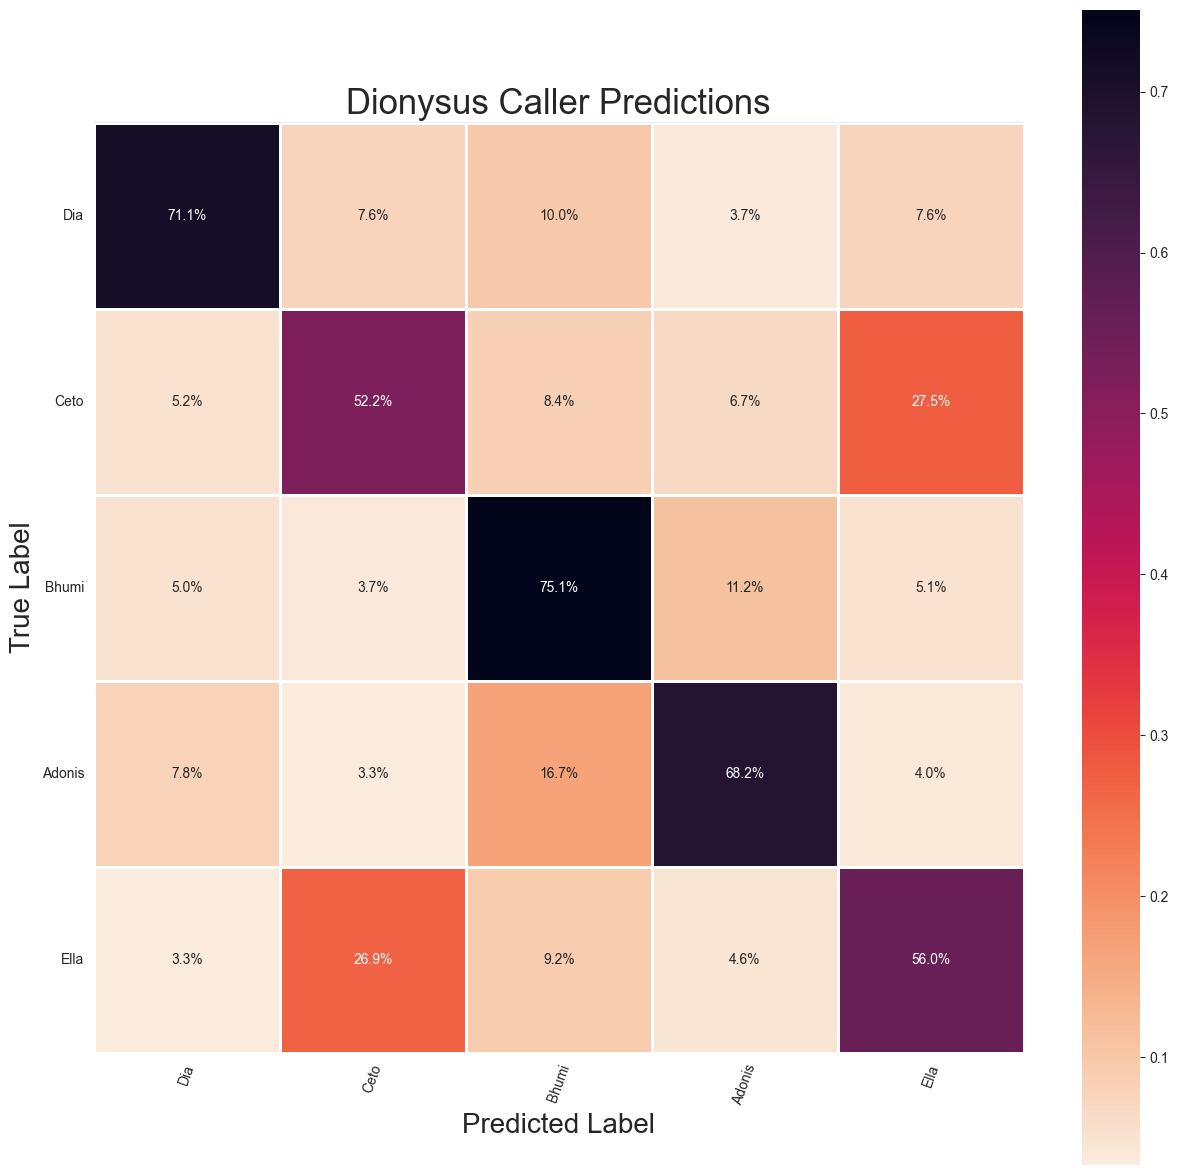

In [10]:
cmn_dio, oob_score_dio,labels_dio =  pred_caller_to_collees_train_test(df_copy.drop(columns=["expname", "expnameid"]),"Dionysus", ["Brahma", "Chaos"])
title_dio = "Dionysus Caller Predictions"
show_cm(cmn_dio,title_dio,labels_dio,oob_score_dio,True,directory_to_save_in)

100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


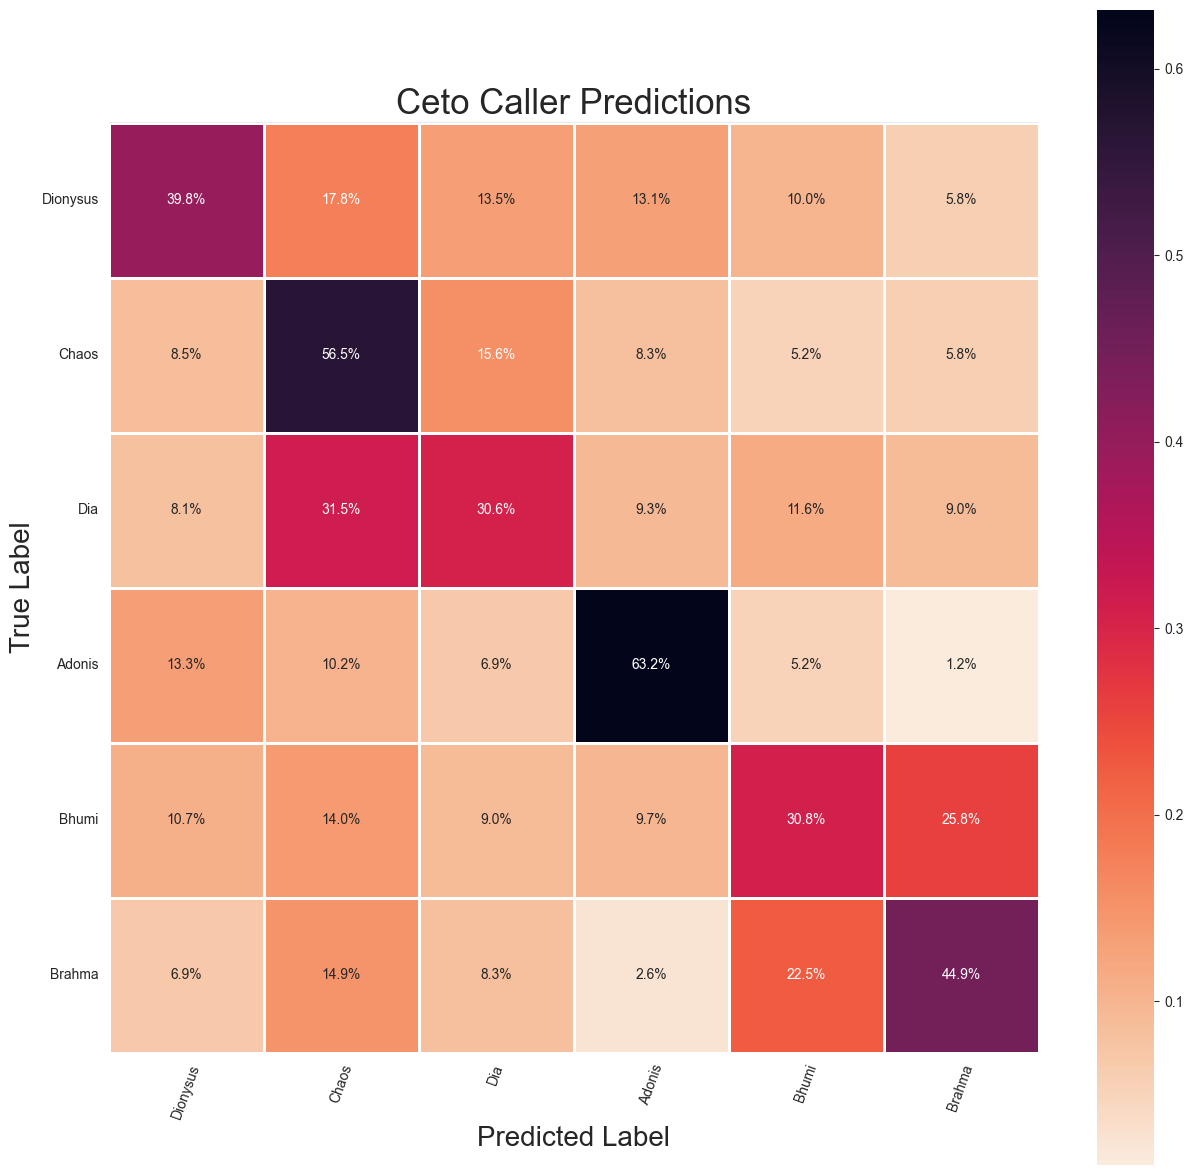

In [11]:
cmn_ceto, oob_score_ceto,labels_ceto =  pred_caller_to_collees_train_test(df_copy.drop(columns=["expname","expnameid"]),"Ceto")
title_ceto = "Ceto Caller Predictions"
show_cm(cmn_ceto,title_ceto,labels_ceto,oob_score_ceto,True,directory_to_save_in)

100%|██████████| 100/100 [00:46<00:00,  2.16it/s]


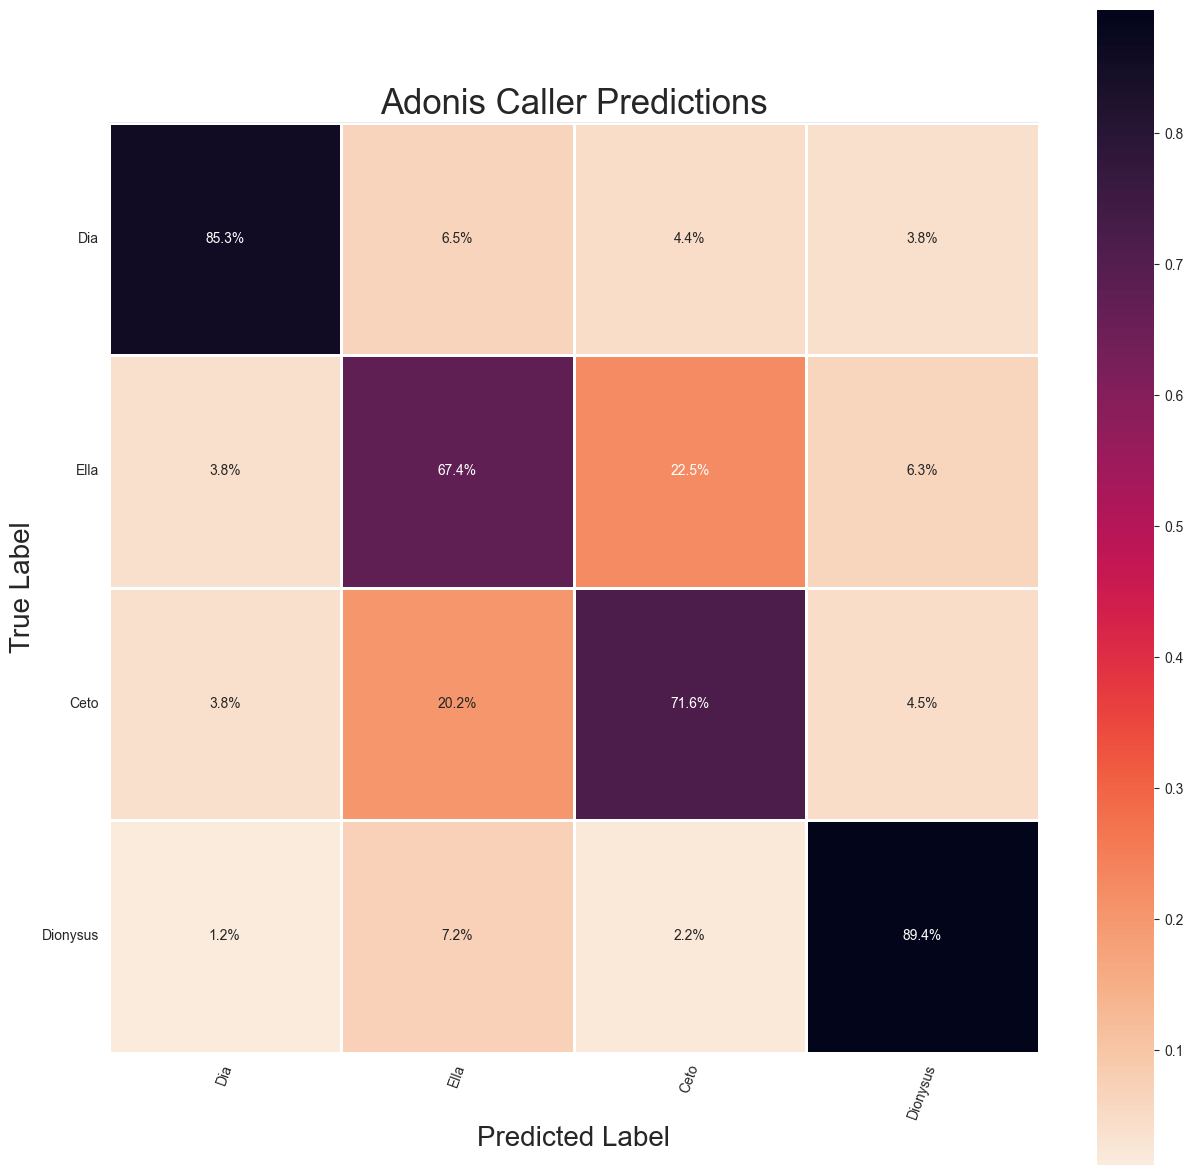

In [12]:
cmn_adonis, oob_score_adonis,labels_adonis =  pred_caller_to_collees_train_test(df_copy.drop(columns=["expname","expnameid"]),"Adonis")
title_adonis = "Adonis Caller Predictions"
show_cm(cmn_adonis,title_adonis,labels_adonis,oob_score_adonis,True,directory_to_save_in)

100%|██████████| 100/100 [00:42<00:00,  2.37it/s]


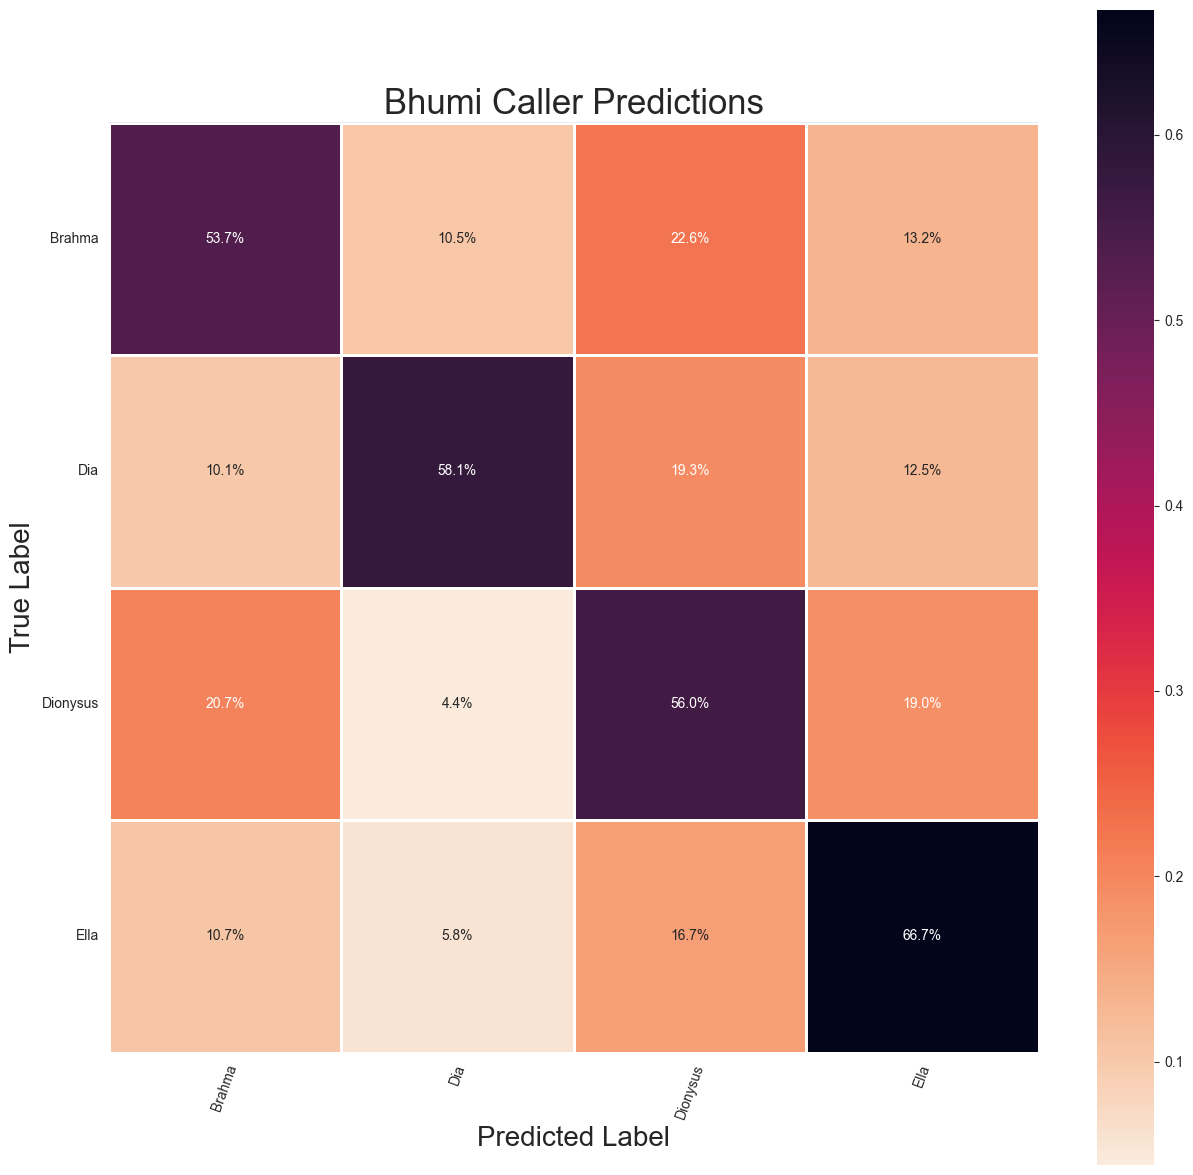

In [13]:
cmn_bhumi, oob_score_bhumi,labels_bhumi =  pred_caller_to_collees_train_test(df_copy.drop(columns=["expname","expnameid"]),"Bhumi", ["Adonis", "Ceto", "Baloo", "Bolt", "Barak", "Bareket"])
title_bhumi = "Bhumi Caller Predictions"
show_cm(cmn_bhumi,title_bhumi,labels_bhumi,oob_score_bhumi,True,directory_to_save_in)

100%|██████████| 100/100 [00:47<00:00,  2.09it/s]


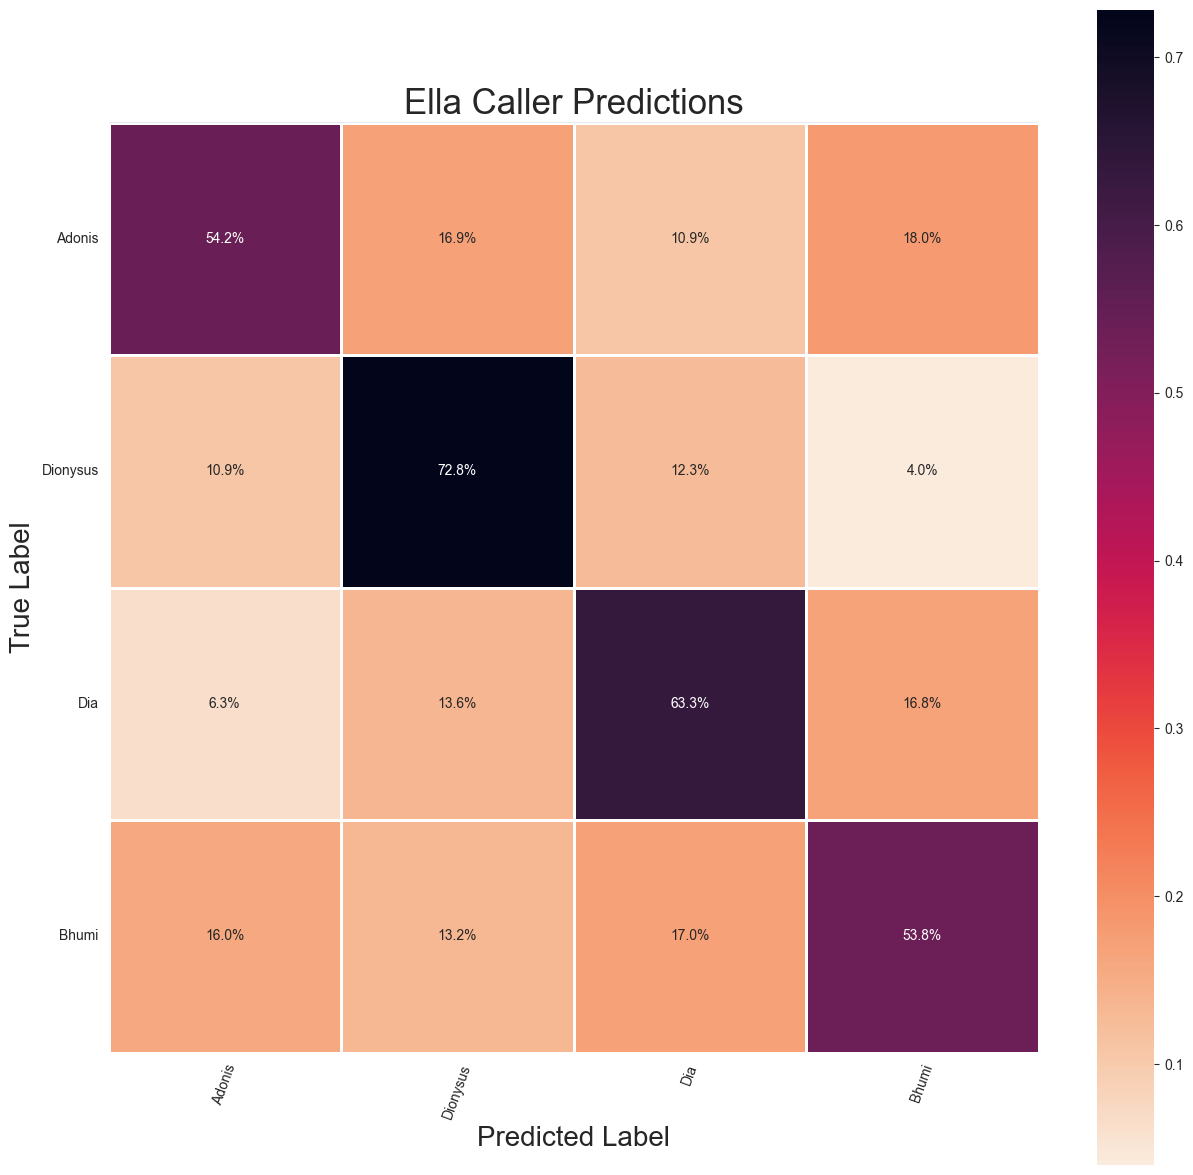

In [16]:
cmn_ella, oob_score_ella,labels_ella =  pred_caller_to_collees_train_test(df_copy.drop(columns=["expname","expnameid"]),"Ella")
title_ella = "Ella Caller Predictions"
show_cm(cmn_ella,title_ella,labels_ella,oob_score_ella,True,directory_to_save_in)